<a href="https://colab.research.google.com/github/Xahoor72/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, roc_auc_score
from google.colab import data_table
data_table.enable_dataframe_formatter()


In [67]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [68]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [69]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17913,29027,-0.422159,0.231118,1.666711,0.451976,-0.203598,0.097244,-0.039666,0.354218,0.062463,...,0.110909,0.435121,-0.056658,0.265867,-0.548204,0.734013,0.117023,0.130972,9.00,0.0
17914,29030,1.177387,-0.215585,0.202972,0.215323,-0.029312,0.601788,-0.297021,0.188082,0.436370,...,-0.055842,0.075903,-0.187120,-0.717798,0.555294,0.731531,-0.022112,-0.010929,25.00,0.0
17915,29030,-0.553746,0.880858,1.644821,-0.132657,0.120940,-0.267411,0.466892,0.222443,-0.639624,...,-0.133339,-0.348662,0.029947,0.199962,-0.328384,0.071511,0.275487,0.110195,0.89,0.0
17916,29030,-2.844632,3.717960,-7.165428,4.120419,-2.991039,-2.942326,-4.925187,2.204337,-2.663613,...,0.894495,-0.340246,0.012222,-0.059679,-0.104338,-0.295884,1.326228,0.322688,89.99,0.0
17917,29031,1.050204,0.078269,0.484733,1.349623,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

In [71]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [72]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0.0    17836
1.0       81
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [73]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [74]:
print(legit.shape)
print(fraud.shape)

(17836, 31)
(81, 31)


In [75]:
# statistical measures of the data
legit.Amount.describe()

count    17836.000000
mean        67.365025
std        188.754429
min          0.000000
25%          5.490000
50%         15.950000
75%         56.232500
max       7712.430000
Name: Amount, dtype: float64

In [76]:
fraud.Amount.describe()

count      81.000000
mean       98.105926
std       267.464067
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [77]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,13891.131980,-0.203851,0.228560,0.840631,0.263581,-0.117213,0.112151,-0.110725,-0.008454,0.752065,...,0.032646,-0.054930,-0.144997,-0.036871,0.015838,0.118904,0.035813,0.010352,0.006670,67.365025
1.0,16833.074074,-9.315066,6.779465,-13.052870,6.451318,-6.557541,-2.602613,-9.012856,4.730365,-3.087651,...,0.756424,0.549752,-0.423495,-0.398104,-0.277836,0.355688,0.177616,0.940693,0.090007,98.105926


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [78]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [79]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [80]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1652,1280,1.317317,-0.030417,-1.088874,-0.557892,2.030908,3.267773,-0.536308,0.808507,-0.052607,...,-0.313907,-1.068412,0.104669,0.992075,0.369762,0.110479,-0.028115,0.011664,0.99,0.0
4818,4303,-0.398484,0.971710,2.115247,2.630897,0.368531,1.746439,-0.105581,0.435100,-0.028384,...,-0.022036,0.071070,-0.071026,-1.241739,-0.458275,0.173766,0.129223,0.119119,53.08,0.0
16514,27883,-3.728833,-3.311956,2.098857,3.434762,4.919362,-3.239352,-1.706301,0.061770,-1.492886,...,0.447375,0.074556,0.586660,0.618290,0.609330,0.168617,-0.295971,-0.062313,25.28,0.0
13824,24510,1.111137,0.058045,0.017382,1.249269,0.478713,0.871117,-0.107408,0.130760,1.436603,...,-0.250881,-0.396494,-0.247106,-1.195331,0.737363,-0.300690,-0.003573,-0.004416,58.00,0.0
14012,24917,1.050282,0.374268,1.520532,2.955253,-0.498195,0.386078,-0.496476,0.085675,1.150913,...,-0.017652,0.417898,-0.031292,0.380957,0.413163,0.117036,0.022474,0.025213,15.92,0.0


In [81]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17317,28625,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,...,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,99.99,1.0
17366,28658,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,...,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99,1.0
17407,28692,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,-3.617242,...,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,99.99,1.0
17453,28726,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1.0
17480,28755,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,-3.565738,...,1.816520,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,99.99,1.0


In [82]:
new_dataset['Class'].value_counts()

Class
0.0    492
1.0     81
Name: count, dtype: int64

In [83]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,13081.048780,-0.211235,0.220753,0.723828,0.341720,-0.148572,0.158916,-0.054796,0.098699,0.685260,...,0.040074,-0.064036,-0.162711,-0.069780,0.039497,0.088946,0.019511,0.028832,0.023991,87.766321
1.0,16833.074074,-9.315066,6.779465,-13.052870,6.451318,-6.557541,-2.602613,-9.012856,4.730365,-3.087651,...,0.756424,0.549752,-0.423495,-0.398104,-0.277836,0.355688,0.177616,0.940693,0.090007,98.105926


Splitting the data into Features & Targets

In [84]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [85]:
print(X)

        Time         V1         V2         V3        V4         V5        V6  \
1652    1280   1.317317  -0.030417  -1.088874 -0.557892   2.030908  3.267773   
4818    4303  -0.398484   0.971710   2.115247  2.630897   0.368531  1.746439   
16514  27883  -3.728833  -3.311956   2.098857  3.434762   4.919362 -3.239352   
13824  24510   1.111137   0.058045   0.017382  1.249269   0.478713  0.871117   
14012  24917   1.050282   0.374268   1.520532  2.955253  -0.498195  0.386078   
...      ...        ...        ...        ...       ...        ...       ...   
17317  28625 -27.848181  15.598193 -28.923756  6.418442 -20.346228 -4.828202   
17366  28658 -28.524268  15.876923 -29.468732  6.447591 -20.786000 -4.865613   
17407  28692 -29.200329  16.155701 -30.013712  6.476731 -21.225810 -4.902997   
17453  28726 -29.876366  16.434525 -30.558697  6.505862 -21.665654 -4.940356   
17480  28755 -30.552380  16.713389 -31.103685  6.534984 -22.105532 -4.977692   

              V7         V8        V9  

In [86]:
print(Y)

1652     0.0
4818     0.0
16514    0.0
13824    0.0
14012    0.0
        ... 
17317    1.0
17366    1.0
17407    1.0
17453    1.0
17480    1.0
Name: Class, Length: 573, dtype: float64


Split the data into Training data & Testing Data

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [88]:
print(X.shape, X_train.shape, X_test.shape)

(573, 30) (458, 30) (115, 30)


Model Training

Logistic Regression

In [89]:
model = LogisticRegression(max_iter=1000)

In [90]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Model Evaluation

Accuracy Score

In [91]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [92]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9890829694323144


In [93]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [94]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9391304347826087


In [95]:
auc = roc_auc_score(Y_test,X_test_prediction)
print("AUC" ,auc)

AUC 0.8598484848484849


In [96]:
report=classification_report(X_test_prediction,Y_test,zero_division=1)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       100
         1.0       0.75      0.80      0.77        15

    accuracy                           0.94       115
   macro avg       0.86      0.88      0.87       115
weighted avg       0.94      0.94      0.94       115



Training Error Rate: 0.010917030567685589
Testing Error Rate: 0.06086956521739131


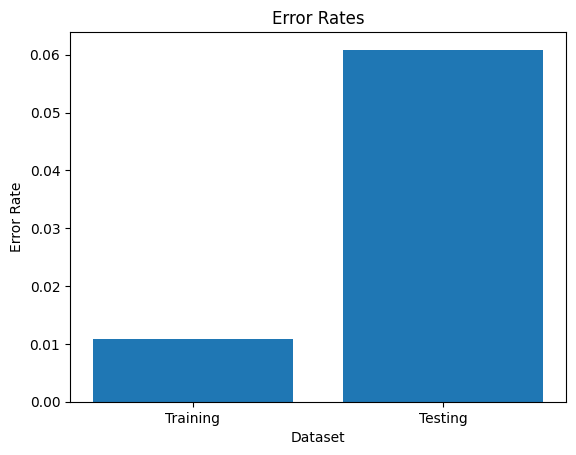

In [97]:
train_error_rate = np.mean(X_train_prediction != Y_train)
test_error_rate = np.mean(X_test_prediction != Y_test)

# Print error rates
print("Training Error Rate:", train_error_rate)
print("Testing Error Rate:", test_error_rate)

# Plot error rates
plt.bar(['Training', 'Testing'], [train_error_rate, test_error_rate])
plt.title('Error Rates')
plt.xlabel('Dataset')
plt.ylabel('Error Rate')
plt.show()